---
# Title, summary, and page position.
linktitle: Practica Machine Learning
summary: Ejercicios de Machine Learning con Scikit-Learn - Soluciones
weight: 61
authors: ["joserzapata"]

# Page metadata.
title: Practica Machine Learning con Scikit-Learn - Soluciones
date: "2026-02-13T00:00:00Z"
lastmod: 2026-02-13
type: book  # Do not modify
---

## Curso Python para Ciencia de datos
#### Por Jose R. Zapata - https://joserzapata.github.io/

[![Invítame a un Café](https://img.buymeacoffee.com/button-api/?text=Invítame+a+un+Café&emoji=&slug=joserzapata&button_colour=328cc1&font_colour=ffffff&font_family=Comic&outline_colour=000000&coffee_colour=FFDD00)](https://www.buymeacoffee.com/joserzapata)

<div class="alert alert-success">

<b>NOTA:</b> Realizar primero los ejercicios y luego revisar las soluciones propuestas.

En este ejercicio práctico se aplicarán los conceptos de Machine Learning con Scikit-Learn vistos en el capítulo anterior:

- Pipelines de transformación
- Validación cruzada (Cross-Validation)
- Búsqueda de hiperparámetros (RandomizedSearchCV)
- Evaluación del modelo final
- Guardar y cargar modelos

</div>

## Descripción del Problema

Usaremos el dataset [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) que contiene características fisicoquímicas de vinos tintos portugueses. El objetivo es predecir la **calidad del vino** (clasificación binaria: bueno o malo) a partir de sus propiedades químicas.

Las características del dataset son:
- `fixed acidity` - acidez fija
- `volatile acidity` - acidez volátil
- `citric acid` - ácido cítrico
- `residual sugar` - azúcar residual
- `chlorides` - cloruros
- `free sulfur dioxide` - dióxido de azufre libre
- `total sulfur dioxide` - dióxido de azufre total
- `density` - densidad
- `pH` - pH
- `sulphates` - sulfatos
- `alcohol` - alcohol
- `quality` - calidad (variable objetivo, valor entre 3 y 8)

Transformaremos la variable `quality` en una variable binaria: **1** (bueno, quality >= 7) y **0** (malo, quality < 7).

---
## Ejercicio 1: Importar librerías

**Importe las siguientes librerías: `pandas`, `sklearn` , `matplotlib` e imprima las versiones de pandas y sklearn.**

In [1]:
# Copie el código aca

Pandas version: 2.2.2
Sklearn version: 1.6.1


---
## Ejercicio 2: Cargar y explorar los datos

**Cargue el dataset de vinos tintos desde la siguiente URL y explore los datos.**

URL: `https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv`

**Nota:** El separador del archivo CSV es `;` (punto y coma).

Realice las siguientes exploraciones:
1. Muestre la información del DataFrame (`.info()`)
2. Muestre las primeras 5 filas
3. Muestre la descripción estadística

In [3]:
# Copie el código aca

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


---
## Ejercicio 3: Verificar valores nulos y duplicados

**Verifique si hay valores nulos en el dataset y cuántos datos duplicados existen. Si hay duplicados, elimínelos.**

In [7]:
# Copie el código aca

In [ ]:
# Verificar valores nulos


Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Total de valores nulos: 0


In [ ]:
# Verificar y eliminar duplicados


Filas antes de eliminar duplicados: 1599
Filas duplicadas: 240
Filas después de eliminar duplicados: 1359


---
## Ejercicio 4: Crear la variable objetivo binaria

**Cree una nueva columna llamada `good_quality` que sea 1 si `quality >= 7` y 0 en caso contrario. Luego elimine la columna `quality` original.**

**Verifique la distribución de clases de la nueva variable objetivo. ¿Hay desbalance de clases?**

In [10]:
# Copie el código aca

In [ ]:
# Crear variable objetivo binaria


# Eliminar la columna quality original

# Verificar distribución de clases


Distribución de clases:
good_quality
0    1175
1     184
Name: count, dtype: int64

Proporción de clase positiva: 13.54%


- Se puede observar que hay un **desbalance de clases**, ya que la clase positiva (vino bueno) representa una proporción mucho menor que la clase negativa.
- Por esta razón, usar **accuracy** como métrica no sería lo más adecuado. Es mejor usar **F1-Score** que balancea precision y recall.

---
## Ejercicio 5: Separar características y variable objetivo

**Separe el DataFrame en `X` (características) y `y` (variable objetivo `good_quality`).**

In [12]:
# Copie el código aca

Forma de X: (1359, 11)
Forma de y: (1359,)

Columnas de X: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


---
## Ejercicio 6: Dividir datos en entrenamiento y test

**Divida los datos en conjuntos de entrenamiento (80%) y test (20%) usando `train_test_split`.**

**Importante:** Use `stratify=y` para mantener la proporción de clases y `random_state=42` para reproducibilidad.

In [14]:
# Copie el código aca

Datos de entrenamiento: 1087 filas
Datos de test: 272 filas

Proporción clase positiva en entrenamiento: 13.52%
Proporción clase positiva en test: 13.60%


- Se puede verificar que la proporción de clases se mantiene similar en ambos conjuntos gracias al parámetro `stratify`.

---
## Ejercicio 7: Crear un Pipeline de preprocesamiento y modelo

**Cree un Pipeline que incluya los siguientes pasos:**

1. **StandardScaler** - para estandarizar las características
2. **RandomForestClassifier** - como modelo de clasificación

**Visualice el pipeline usando `set_config(display="diagram")`.**

Documentación:
- [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [16]:
# Copie el código aca

Pipeline(steps=[('scaler', StandardScaler()),
                ('modelo', RandomForestClassifier(random_state=42))])

---
## Ejercicio 8: Evaluar el modelo con Validación Cruzada

**Evalúe el pipeline usando validación cruzada con 10 segmentos (folds).**

Use `StratifiedKFold` en lugar de `KFold` para mantener la proporción de clases en cada fold (importante cuando hay desbalance de clases).

Use la métrica **F1-Score** (`scoring='f1'`) ya que hay desbalance de clases.

**Imprima el resultado promedio y la desviación estándar.**

Documentación:
- [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
- [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

In [18]:
# Copie el código aca

F1-Score por fold: [0.58333333 0.36363636 0.45454545 0.27272727 0.60869565 0.5
 0.10526316 0.5        0.3        0.33333333]
F1-Score Promedio: 0.4022
F1-Score STD: 0.1480


---
## Ejercicio 9: Comparar múltiples modelos con Cross-Validation

**Compare al menos 3 modelos diferentes usando validación cruzada con la misma métrica (F1-Score) y el mismo esquema de folds.**

Modelos sugeridos:
1. `RandomForestClassifier`
2. `GradientBoostingClassifier`
3. `LogisticRegression`

**Cree un pipeline para cada modelo (con StandardScaler) y compare los resultados.**

Documentación:
- [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [20]:
# Copie el código aca

Definir los pipelines para random forest


In [22]:
# Copie el código aca

Pipeline(steps=[('scaler', StandardScaler()),
                ('modelo', RandomForestClassifier(random_state=42))])

Definir los pipelines para gradient boosting

In [24]:
# Copie el código aca

Pipeline(steps=[('scaler', StandardScaler()),
                ('modelo', GradientBoostingClassifier(random_state=42))])

Definir los pipelines para logistic regression

In [26]:
# Copie el código aca

Pipeline(steps=[('scaler', StandardScaler()),
                ('modelo', LogisticRegression(max_iter=1000, random_state=42))])

Evaluar cada modelo con cross-validation

In [28]:
# Copie el código aca

Random Forest             -> F1-Score: 0.4022 ± 0.1480
Gradient Boosting         -> F1-Score: 0.4513 ± 0.1745
Logistic Regression       -> F1-Score: 0.3787 ± 0.1165


Crear una visualizacion de boxplot de los resultados de los modelos

In [30]:
# Copie el código aca


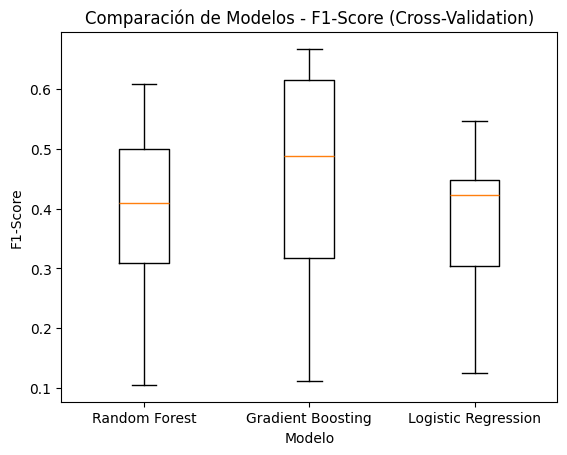

---
## Ejercicio 10: Búsqueda de Hiperparámetros con RandomizedSearchCV

**Tome el mejor modelo del ejercicio anterior y realice una búsqueda de hiperparámetros usando `RandomizedSearchCV`.**

`RandomizedSearchCV` es más eficiente que `GridSearchCV` cuando el espacio de hiperparámetros es grande, ya que prueba combinaciones aleatorias en lugar de todas las posibles.

**Para RandomForestClassifier, defina los siguientes rangos de hiperparámetros:**

```python
param_distributions = {
    "modelo__n_estimators": [50, 100, 200, 300, 500],
    "modelo__max_depth": [3, 5, 10, 15, 20, None],
    "modelo__min_samples_split": [2, 5, 10],
    "modelo__min_samples_leaf": [1, 2, 4],
    "modelo__max_features": ["sqrt", "log2", None],
}
```

Use `n_iter=50` para probar 50 combinaciones aleatorias, `scoring='f1'` y `cv=skfold`.

Documentación: [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

In [32]:
# Copie el código aca

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('modelo',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'modelo__max_depth': [3, 5, 10, 15, 20,
                                                              None],
                                        'modelo__max_features': ['sqrt', 'log2',
                                                                 None],
                                        'modelo__min_samples_leaf': [1, 2, 4],
                                        'modelo__min_samples_split': [2, 5, 10],
                                        'modelo__n_estimators': [50, 100, 200,
                                                                 300, 500]},
                   random_state=42, scoring='f1')

---
## Ejercicio 11: Analizar los resultados de la búsqueda de hiperparámetros

**Imprima los mejores hiperparámetros encontrados, el mejor F1-Score de cross-validation y su desviación estándar.**

**Además, muestre los 5 mejores resultados de la búsqueda en un DataFrame ordenado por el score.**

In [34]:
# Copie el código aca

Mejores hiperparámetros encontrados:
  modelo__n_estimators: 200
  modelo__min_samples_split: 2
  modelo__min_samples_leaf: 1
  modelo__max_features: sqrt
  modelo__max_depth: 20

Mejor F1-Score CV: 0.4168
STD del mejor resultado: 0.1716


,params,mean_test_score,std_test_score,rank_test_score
48,"{'modelo__n_estimators': 200, 'modelo__min_sam...",0.416835,0.171640,1
18,"{'modelo__n_estimators': 300, 'modelo__min_sam...",0.407582,0.163016,2
37,"{'modelo__n_estimators': 100, 'modelo__min_sam...",0.405417,0.155120,3
15,"{'modelo__n_estimators': 100, 'modelo__min_sam...",0.404692,0.154009,4
47,"{'modelo__n_estimators': 100, 'modelo__min_sam...",0.404692,0.154009,4


---
## Ejercicio 12: Evaluar el modelo final con datos de Test

**Configure el pipeline con los mejores hiperparámetros, entrénelo con todos los datos de entrenamiento y evalúe con los datos de test.**

**Calcule las siguientes métricas en los datos de test:**
- Accuracy
- Precision
- Recall
- F1-Score

**Además, muestre el reporte de clasificación completo usando `classification_report`.**

Documentación: [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [37]:
# Copie el código aca

Métricas en datos de Test:
  Accuracy:  0.8934
  Precision: 0.7222
  Recall:    0.3514
  F1-Score:  0.4727


Crear un Reporte de clasificación con el método classification_report

In [39]:
# Copie el código aca


Reporte de Clasificación:
              precision    recall  f1-score   support

        Malo       0.91      0.98      0.94       235
       Bueno       0.72      0.35      0.47        37

    accuracy                           0.89       272
   macro avg       0.81      0.67      0.71       272
weighted avg       0.88      0.89      0.88       272



---
## Ejercicio 13: Matriz de Confusión

**Visualice la matriz de confusión del modelo usando `ConfusionMatrixDisplay`.**

Documentación: [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

In [41]:
# Copie el código aca

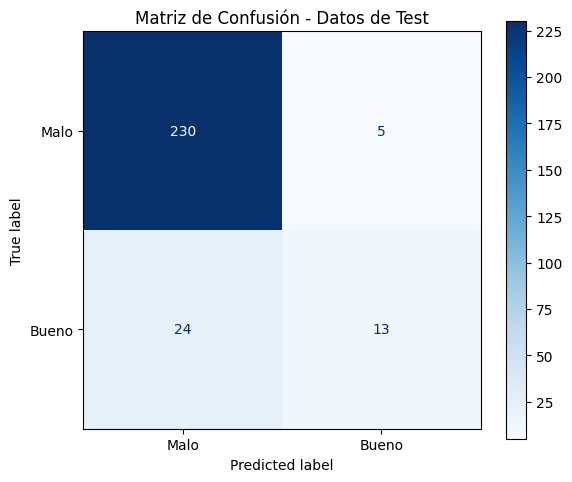

---
## Ejercicio 14: Pipeline con ColumnTransformer (Ejercicio Avanzado)

**Cree un pipeline más complejo que aplique diferentes transformaciones a diferentes columnas usando `ColumnTransformer`.**

Suponga que las primeras 7 columnas (`fixed acidity` hasta `total sulfur dioxide`) son características que necesitan estandarización con `StandardScaler`, y las últimas 4 columnas (`density` hasta `alcohol`) necesitan escalamiento con `MinMaxScaler`.

**Pasos:**
1. Defina las listas de columnas para cada tipo de transformación
2. Cree un `ColumnTransformer` con los transformadores apropiados
3. Cree un Pipeline completo con el `ColumnTransformer` y un `GradientBoostingClassifier`
4. Evalúe con cross-validation

Documentación:
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [43]:
# Copie el código aca

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('modelo', GradientBoostingClassifier(random_state=42))])

Evaluar con cross-validation

In [45]:
# Copie el código aca


F1-Score Promedio: 0.4513
F1-Score STD: 0.1745


Crear un Boxplot de los resultados del F1-Score de los 10 folds

In [47]:
# Copie el código aca

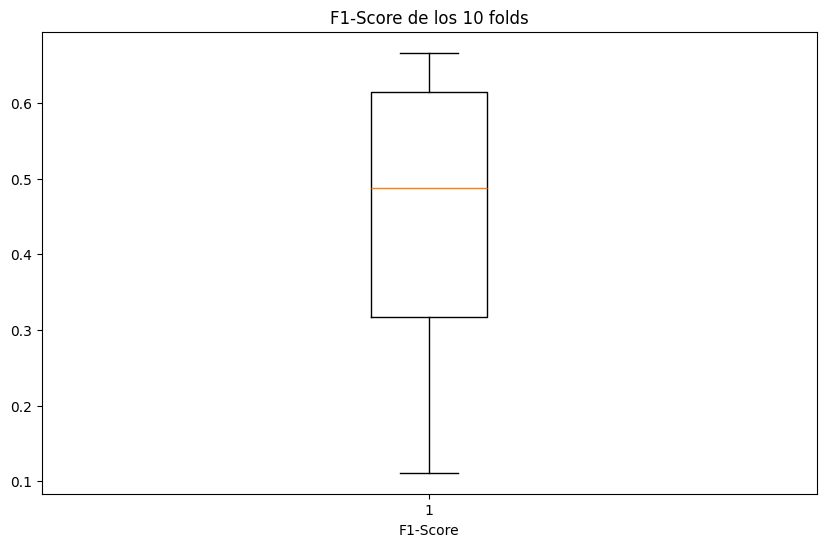

---
## Ejercicio 15: RandomizedSearchCV con el Pipeline avanzado

**Realice una búsqueda de hiperparámetros con `RandomizedSearchCV` para el pipeline con `ColumnTransformer` y `GradientBoostingClassifier`.**

**Defina los siguientes rangos de hiperparámetros:**

```python
param_distributions_gb = {
    "modelo__n_estimators": [50, 100, 200, 300],
    "modelo__max_depth": [3, 5, 7, 10],
    "modelo__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "modelo__min_samples_split": [2, 5, 10],
    "modelo__min_samples_leaf": [1, 2, 4],
    "modelo__subsample": [0.8, 0.9, 1.0],
}
```

Use `n_iter=50`, `scoring='f1'` y `cv=skfold`.

In [49]:
# Copie el código aca

Mejores hiperparámetros encontrados:
  modelo__subsample: 1.0
  modelo__n_estimators: 200
  modelo__min_samples_split: 2
  modelo__min_samples_leaf: 2
  modelo__max_depth: 3
  modelo__learning_rate: 0.2

Mejor F1-Score CV: 0.4681
STD del mejor resultado: 0.1643


---
## Ejercicio 16: Evaluación final del mejor modelo

**Entrene el mejor modelo (con los mejores hiperparámetros) con todos los datos de entrenamiento y evalúe con los datos de test.**

**Muestre las métricas y el reporte de clasificación.**

In [51]:
# Copie el código aca

Métricas en datos de Test (Gradient Boosting optimizado):
  Accuracy:  0.8971
  Precision: 0.6957
  Recall:    0.4324
  F1-Score:  0.5333

Reporte de Clasificación:
              precision    recall  f1-score   support

        Malo       0.92      0.97      0.94       235
       Bueno       0.70      0.43      0.53        37

    accuracy                           0.90       272
   macro avg       0.81      0.70      0.74       272
weighted avg       0.89      0.90      0.89       272



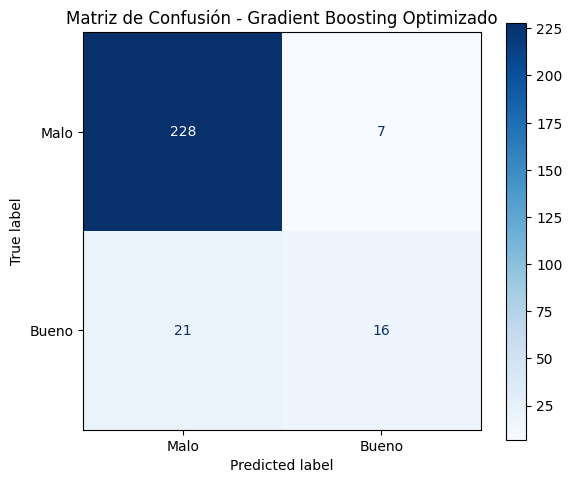

---
## Ejercicio 17: Entrenar modelo final y guardarlo

**Entrene el mejor modelo con TODOS los datos disponibles (entrenamiento + test) y guárdelo usando `joblib`.**

Esto se hace para aprovechar al máximo la información disponible antes de desplegar el modelo en producción.

Documentación: [Model Persistence](https://scikit-learn.org/stable/model_persistence.html)

In [54]:
# Copie el código aca

F1-Score (todos los datos): 0.9973

Modelo guardado exitosamente en 'pipeline_wine_quality.joblib'


---
## Ejercicio 18: Cargar el modelo y hacer predicciones

**Cargue el modelo guardado y realice predicciones con nuevos datos.**

Use los siguientes datos de ejemplo para hacer predicciones:

```python
nuevos_datos = pd.DataFrame({
    "fixed acidity": [7.4, 11.2],
    "volatile acidity": [0.70, 0.28],
    "citric acid": [0.00, 0.56],
    "residual sugar": [1.9, 1.9],
    "chlorides": [0.076, 0.075],
    "free sulfur dioxide": [11.0, 17.0],
    "total sulfur dioxide": [34.0, 60.0],
    "density": [0.9978, 0.9980],
    "pH": [3.51, 3.16],
    "sulphates": [0.56, 0.58],
    "alcohol": [9.4, 9.8],
})
```

In [56]:
# Copie el código aca

Predicciones para nuevos datos:
  Vino 1: 0 (Malo)
  Vino 2: 0 (Malo)


---
## Ejercicio 19 (Bono): Importancia de las características

**Extraiga la importancia de las características del mejor modelo y visualícelas en un gráfico de barras horizontal.**

**Tip:** Para acceder al modelo dentro del pipeline, use `pipeline.named_steps['modelo']` y luego `.feature_importances_`.

In [58]:
# Copie el código aca

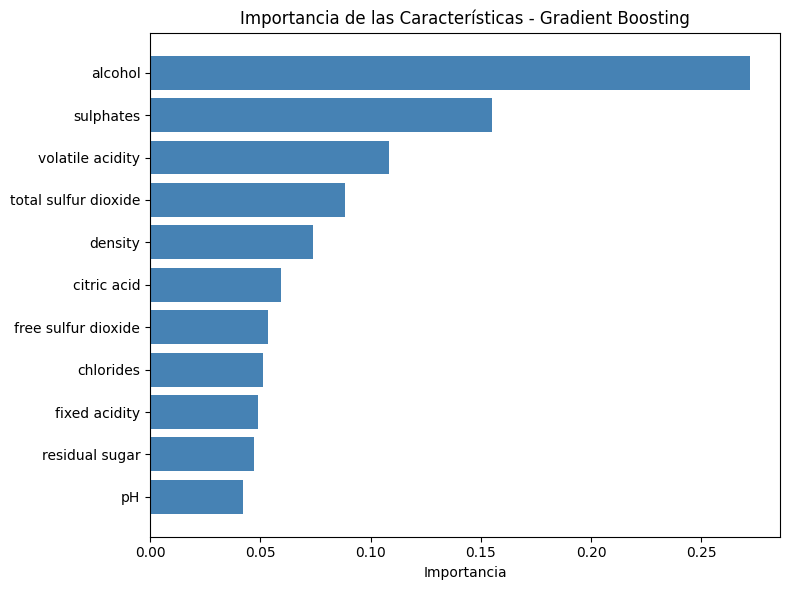

---
## Resumen

En esta práctica se aplicaron los siguientes conceptos de Machine Learning con Scikit-Learn:

1. **Exploración y preparación de datos:** carga, limpieza, eliminación de duplicados y creación de variable objetivo binaria
2. **Pipelines:** creación de pipelines simples y con `ColumnTransformer` para diferentes transformaciones por columna
3. **Validación cruzada:** uso de `StratifiedKFold` y `cross_validate` para evaluar modelos de forma robusta
4. **Comparación de modelos:** evaluación de múltiples algoritmos con la misma metodología
5. **Búsqueda de hiperparámetros:** uso de `RandomizedSearchCV` para encontrar la mejor configuración
6. **Evaluación final:** métricas de clasificación, reporte de clasificación y matriz de confusión
7. **Persistencia del modelo:** guardar y cargar el pipeline completo con `joblib`
8. **Importancia de características:** análisis de qué variables son más relevantes para el modelo

**Phd. Jose R. Zapata**
- [https://joserzapata.github.io/](https://joserzapata.github.io/)
- [https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/](https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/)